# Keras Merge Networks

The power of a DNN does not only come from its depth but also come from its flexibility of accommodating complex network structures. In this example, both branches of the neworks could be combined with a MERGE layer. There are multiple benefits of such merged DNNs. For instance, the DNN has the flexibility to handle various inputs differently. In addition, new features can be added conveniently without messing around with the existing network structure. 

<img src="https://s3.amazonaws.com/keras.io/img/two_branches_sequential_model.png" />

In [1]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,concatenate
from tensorflow.keras.utils import plot_model

In [2]:
# a single input layer
inputs = Input(shape=(3,))

# model 1
x1 = Dense(3, activation='relu')(inputs)
x1 = Dense(2, activation='relu')(x1)
x1 = Dense(2, activation='tanh')(x1)

# model 2 
x2 = Dense(3, activation='linear')(inputs)
x2 = Dense(4, activation='tanh')(x2)
x2 = Dense(3, activation='tanh')(x2)

# merging models
x3 = concatenate([x1, x2])

# output layer
predictions = Dense(1, activation='sigmoid')(x3)

# generate a model from the layers above
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Verify how the network looks
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 3)            12          ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 3)            12          ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 2)            8           ['dense[0][0]']                  
                                                                                              

### Visualize the network

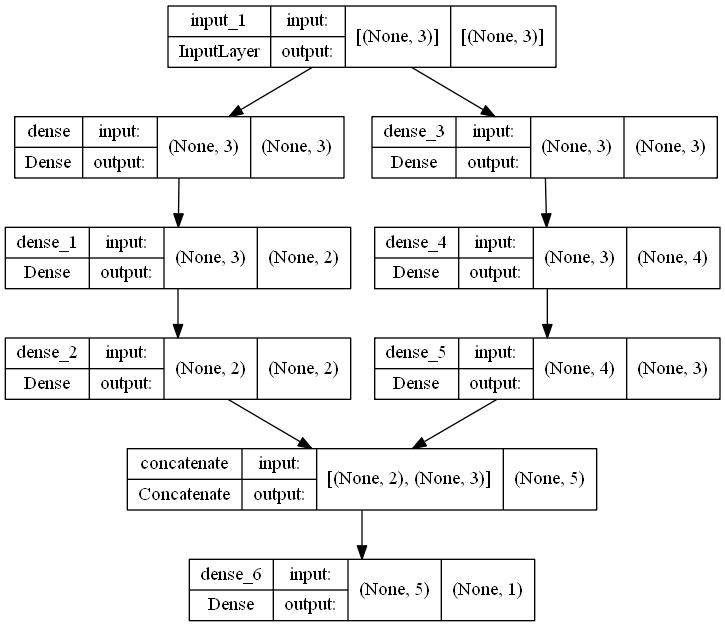

In [3]:
plot_model(model,show_shapes = True, show_layer_names = True)